# Libraries

In [1]:
import pandas as pd
import numpy as np
import random

# Data Collection & Structure

In [2]:
df=pd.read_excel("ChampionsLeague.xlsx")
df.head()

,Sira,Takim,Oynanan_Mac,Averaj,Puan,1_Rakip,2_Rakip,Kadro_Degeri
0,1,Arsenal,6,16,18,Inter,K. Almaty,1290000000
1,2,Bayern Münih,6,11,15,Union SG,PSV,951650000
2,3,PSG,6,11,13,Sporting CP,Newcastle,1150000000
3,4,Man. City,6,6,13,Bodo/Glimt,Galatasaray,1190000000
4,5,Atalanta,6,2,13,Ath. Bilbao,Union SG,459100000


# Data Preprocessing

In [3]:
df["1_8"]=0
df["9_16"]=0
df["17_24"]=0
df["25_36"]=0
df["Puan_Yedek"]=df["Puan"]

In [4]:
def create_random_probabilities():
    outcomes = ["Win", "Draw", "Lose"]
    return random.choice(outcomes)

In [5]:
def get_points(result):
    if result == "Win":
        return 3,0
    elif result == "Draw":
        return 1,1
    else:
        return 0,3

In [6]:
def simulate_match_between_teams(Team1, Team2):
    team1_result = create_random_probabilities()
    team1_points,team2_points = get_points(team1_result)
    return team1_points,team2_points

In [7]:
df3 = pd.DataFrame({
    "Puan": df["Puan"].unique(),
    "1_8": [0]*len(df["Puan"].unique()),
    "9_16": [0]*len(df["Puan"].unique()),
    "17_24": [0]*len(df["Puan"].unique()),
    "25_36": [0]*len(df["Puan"].unique())
})
df3.head()

,Puan,1_8,9_16,17_24,25_36
0,18,0,0,0,0
1,15,0,0,0,0
2,13,0,0,0,0
3,12,0,0,0,0
4,11,0,0,0,0


# Monte Carlo Simulation

In [ ]:
for simulation in range(2000):
    df2 = df.copy()
    detective =[]
    for i in range(len(df2)):
        #df.at[row, column]
        Team1 = df2.at[i, "Takim"]
        Team2 = df2.at[i, "1_Rakip"]
        Team3 = df2.at[i, "2_Rakip"]
        
        match_key= tuple(sorted([Team1, Team2]))
        match_key2= tuple(sorted([Team1, Team3]))
        team1_points, team2_points = simulate_match_between_teams(Team1, Team2)
        team1_points2, team3_points = simulate_match_between_teams(Team1, Team3)
        if match_key in detective:
            team1_points = 0
            team2_points = 0
        if match_key2 in detective:
            team1_points2 = 0
            team3_points = 0
        detective.append(match_key)
        detective.append(match_key2)
        df2.loc[df2["Takim"] == Team1, "Puan"] += team1_points
        df2.loc[df2["Takim"] == Team2, "Puan"] += team2_points
        df2.loc[df2["Takim"] == Team1, "Puan"] += team1_points2
        df2.loc[df2["Takim"] == Team3, "Puan"] += team3_points

    df2.sort_values(by=["Puan","Averaj"], ascending=False, inplace=True,ignore_index=True)
    for j in range(len(df2)):
        if j<8:
            df2.at[j, "1_8"] +=1
        elif j<16:
            df2.at[j, "9_16"] +=1
        elif j<24:
            df2.at[j, "17_24"] +=1
        else:
            df2.at[j, "25_36"] +=1
    for puan in df3["Puan"]:
        # loc [row, column]
        df3.loc[df3["Puan"]==puan, "1_8"] += df2.loc[df2["Puan_Yedek"]==puan, "1_8"].sum()
        df3.loc[df3["Puan"]==puan, "9_16"] += df2.loc[df2["Puan_Yedek"]==puan, "9_16"].sum()
        df3.loc[df3["Puan"]==puan, "17_24"] += df2.loc[df2["Puan_Yedek"]==puan, "17_24"].sum()
        df3.loc[df3["Puan"]==puan, "25_36"] += df2.loc[df2["Puan_Yedek"]==puan, "25_36"].sum()


# Probability Aggregation

In [61]:
df3

,Puan,1_8,9_16,17_24,25_36
0,18,2000,0,0,0
1,15,1991,9,0,0
2,13,4374,1626,0,0
3,12,4426,3337,237,0
4,11,1374,2118,508,0
5,10,1198,4143,2659,0
6,9,603,3539,5444,414
7,8,34,506,1157,303
8,7,0,596,2929,2475
9,6,0,124,2109,3767


In [ ]:
cols = ["1_8","9_16","17_24","25_36"]
# Dividing the values ​​in each row by the sum of the values ​​in that row.
df3[cols] = df3[cols].div(df3[cols].sum(axis=1), axis=0)

In [63]:
df3

,Puan,1_8,9_16,17_24,25_36
0,18,1.00000,0.000000,0.000000,0.000000
1,15,0.99550,0.004500,0.000000,0.000000
2,13,0.72900,0.271000,0.000000,0.000000
3,12,0.55325,0.417125,0.029625,0.000000
4,11,0.34350,0.529500,0.127000,0.000000
5,10,0.14975,0.517875,0.332375,0.000000
6,9,0.06030,0.353900,0.544400,0.041400
7,8,0.01700,0.253000,0.578500,0.151500
8,7,0.00000,0.099333,0.488167,0.412500
9,6,0.00000,0.020667,0.351500,0.627833


# Data Visualization

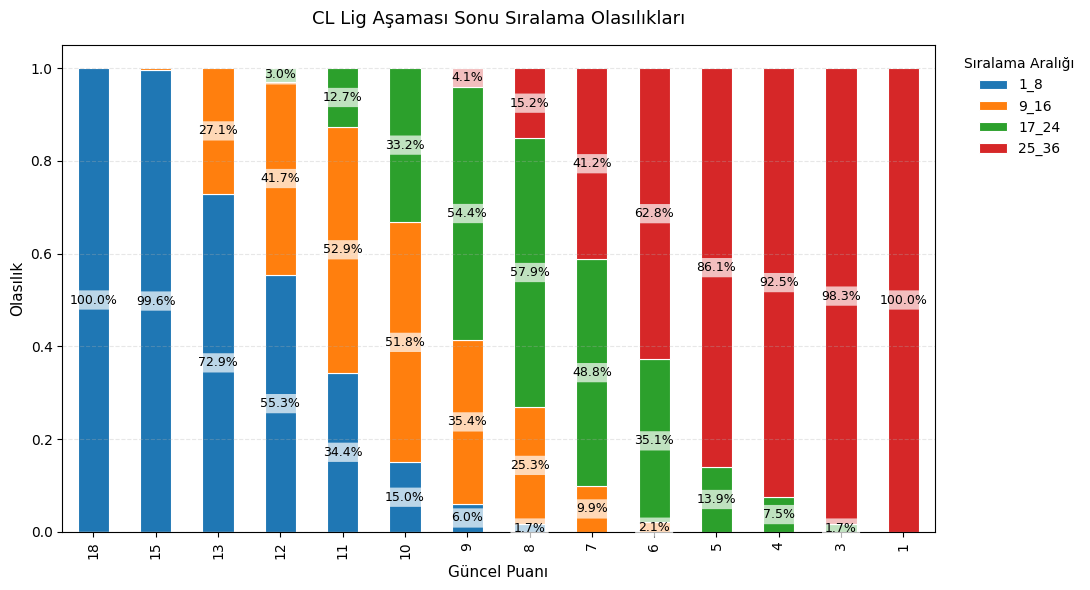

In [67]:
import matplotlib.pyplot as plt

cols = ["1_8","9_16","17_24","25_36"]

ax = df3.set_index("Puan")[cols].plot(
    kind="bar",
    stacked=True,
    figsize=(11,6),
    edgecolor="white",
    linewidth=0.8
)

ax.set_ylabel("Olasılık", fontsize=11)
ax.set_xlabel("Güncel Puanı", fontsize=11)
ax.set_title(
    "CL Lig Aşaması Sonu Sıralama Olasılıkları",
    fontsize=13,
    pad=15
)

# 🔥 OKUNAKLI LABEL + ARKA PLAN KUTUSU
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0.01:  # %5 altını yazma
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f"{height*100:.1f}%",
                ha="center",
                va="center",
                fontsize=9,
                color="black",
                bbox=dict(
                    facecolor="white",
                    edgecolor="none",
                    boxstyle="round,pad=0.25",
                    alpha=0.7
                )
            )

# 🔹 Legend
ax.legend(
    title="Sıralama Aralığı",
    bbox_to_anchor=(1.02,1),
    loc="upper left",
    frameon=False
)

# 🔹 Grid (çok hafif)
ax.grid(axis="y", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()


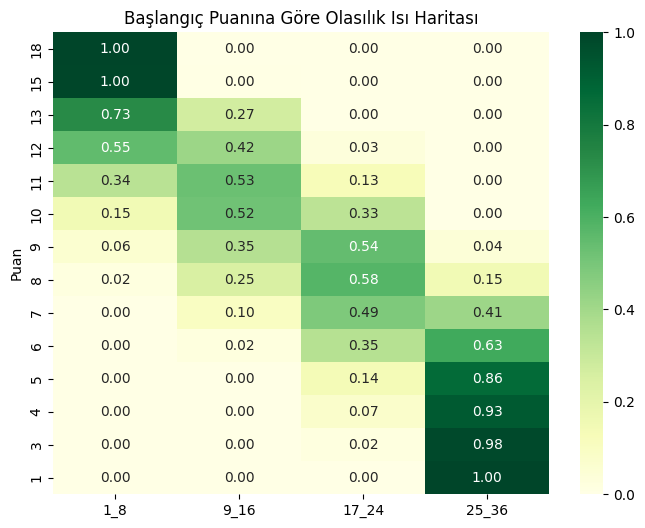

In [77]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(
    df3.set_index("Puan")[cols],
    annot=True,
    cmap="YlGn",
    fmt=".2f"
)
plt.title("Başlangıç Puanına Göre Olasılık Isı Haritası")
plt.show()
